#### Helllo! Third take folks. Gonna try to make the time slider using Folium this time. Fingers crossed.

##### Data --> https://data.seattle.gov/Permitting/Building-Permits/76t5-zqzr/about_data

Helpful guides (((????)))) Below

https://jens-wirelesscar.medium.com/lhexagone-in-hexagons-uber-h3-map-1566bc412172

https://medium.com/nerd-for-tech/time-lapse-heat-maps-with-folium-1847f53ec956

https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import h3pandas
import h3
import geojson

import folium
import folium.plugins as plugins
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime, TimeSliderChoropleth

from geojson import Feature, Point, FeatureCollection
import json

permits_df = pd.read_csv('C:/Users/aaron/Code/Data/Building_Permits_20240307.csv', parse_dates=[10])

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

In [2]:
### this epic line of code prints out the null percentage for each column
(permits_df.isnull().sum()/permits_df.isnull().shape[0])*100

PermitNum                 0.000000
PermitClass               3.790528
PermitClassMapped         3.790528
PermitTypeMapped          0.000000
PermitTypeDesc            6.113112
Description               0.188033
HousingUnits             83.531617
HousingUnitsRemoved      52.703629
HousingUnitsAdded        52.703629
EstProjectCost           20.371379
AppliedDate              23.130949
IssuedDate               27.113025
ExpiresDate              27.022230
CompletedDate            49.941716
StatusCurrent             0.000000
RelatedMup               91.933925
OriginalAddress1          0.276484
OriginalCity              4.055883
OriginalState             3.991448
OriginalZip               6.432944
ContractorCompanyName    83.333040
Link                      0.000000
Latitude                  1.654805
Longitude                 1.654805
Location1                 1.654805
dtype: float64

In [3]:
## Add a year column and drop all rows with null location or null 'AppliedDate'.

permits_df = permits_df.dropna(subset={'Location1', 'AppliedDate'})
permits_df['AppliedYear'] = pd.DatetimeIndex(permits_df['AppliedDate']).year.astype(int)
#permits_df['AppliedYear'] = permits_df['AppliedYear'].astype(int)

In [4]:
geo_permits_df = gpd.GeoDataFrame(permits_df, geometry=gpd.points_from_xy(permits_df.Longitude, permits_df.Latitude))

In [5]:
geo_permits_df.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,AppliedDate,IssuedDate,ExpiresDate,CompletedDate,StatusCurrent,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1,AppliedYear,geometry
0,6936152-DM,Multifamily,Residential,Demolition,NaN,"Demo multi-family structure, per plan",20.0,20.0,236.0,21424875.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,4200 S WEBSTER ST,SEATTLE,WA,98118.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.535552,-122.280227,"(47.53555241, -122.2802271)",2024,POINT (-122.28023 47.53555)
1,6994764-CN,Multifamily,Residential,Building,New,"Construct north two-family dwelling, per plan....",NaN,NaN,NaN,565948.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,1615 N 50TH ST,SEATTLE,WA,98103.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.664802,-122.338456,"(47.66480192, -122.3384564)",2024,POINT (-122.33846 47.66480)
2,6999483-DM,Multifamily,Residential,Demolition,Deconstruction,Demolish existing single-family dwelling with ...,1.0,1.0,4.0,0.0,2024-03-05,NaN,NaN,NaN,Scheduled and Submitted,NaN,6117 12TH AVE NE,SEATTLE,WA,98115.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.672957,-122.315952,"(47.67295731, -122.31595199)",2024,POINT (-122.31595 47.67296)
3,7002569-CN,Single Family/Duplex,Residential,Building,New,Establish use as single family residence with ...,NaN,NaN,NaN,743455.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,322 NW 47th ST,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,47.663071,-122.361852,"(47.66307142, -122.36185191)",2024,POINT (-122.36185 47.66307)
4,7002837-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Deck Construction,1.0,0.0,0.0,20000.0,2024-03-05,2024-03-05,2025-09-05,NaN,Additional Info Requested,NaN,4028 SW THISTLE ST,SEATTLE,WA,98136.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.528642,-122.384193,"(47.5286416, -122.38419264)",2024,POINT (-122.38419 47.52864)


In [6]:
### Creates a dataframe for every year between 2007 and 2024.
dfDict = { i: geo_permits_df[geo_permits_df['AppliedYear'] == i] for i in range(2007,2025) }

In [7]:
#fig, ax = plt.subplots(figsize  = (21, 21))

#hexagons_2014 = dfDict.get(2014).h3.geo_to_h3_aggregate(9)
#hexagons_2014.plot(column = 'EstProjectCost',
  #              legend = True,
                #norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 100),
 #               ax = ax)

#ax.set_title("Seattle Project Cost (estimated)", fontsize=15)

In [8]:
hex_df_list = {}

for year in dfDict:
    hex_df_list['hexagons_{0}'.format(year)] = dfDict.get(year).h3.geo_to_h3_aggregate(9)

hexes_all_years = geo_permits_df.h3.geo_to_h3_aggregate(9).reset_index()

all_hexagons_series = hexes_all_years['h3_09']

#hex_df_list

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)
C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)
C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns

In [9]:
hex_df_list.get('hexagons_2023')

,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,OriginalZip,Latitude,Longitude,AppliedYear,geometry
h3_09,,,,,,,,,
8928d540103ffff,4.0,2.0,2.0,1571633.0,490525.0,238.294766,-611.405771,10115,"POLYGON ((-122.27904 47.65803, -122.27784 47.6..."
8928d540107ffff,1.0,0.0,0.0,650000.0,196210.0,95.321735,-244.568061,4046,"POLYGON ((-122.28303 47.65912, -122.28183 47.6..."
8928d54010fffff,0.0,0.0,0.0,11740935.0,588630.0,428.960870,-1100.533253,18207,"POLYGON ((-122.27924 47.66089, -122.27805 47.6..."
8928d540113ffff,3.0,0.0,0.0,762368.0,490525.0,238.281800,-611.396802,10115,"POLYGON ((-122.27883 47.65518, -122.27764 47.6..."
8928d540117ffff,6.0,0.0,1.0,637222.0,686735.0,333.598531,-855.995708,14161,"POLYGON ((-122.28282 47.65627, -122.28163 47.6..."
...,...,...,...,...,...,...,...,...,...
8928d5576b7ffff,0.0,0.0,0.0,15000.0,98126.0,47.517958,-122.368027,2023,"POLYGON ((-122.36656 47.51674, -122.36537 47.5..."
8928d5576bbffff,0.0,0.0,0.0,67800.0,392424.0,190.073464,-489.438234,8092,"POLYGON ((-122.35880 47.51742, -122.35761 47.5..."
8928d5576c7ffff,0.0,0.0,0.0,8366.0,98106.0,47.518171,-122.347710,2023,"POLYGON ((-122.34706 47.51702, -122.34587 47.5..."


In [10]:
indexlist = []
for x in range(2007,2025):
    indexlist = indexlist + [x]

Text(0.5, 1.0, 'Seattle Project Cost (estimated)')

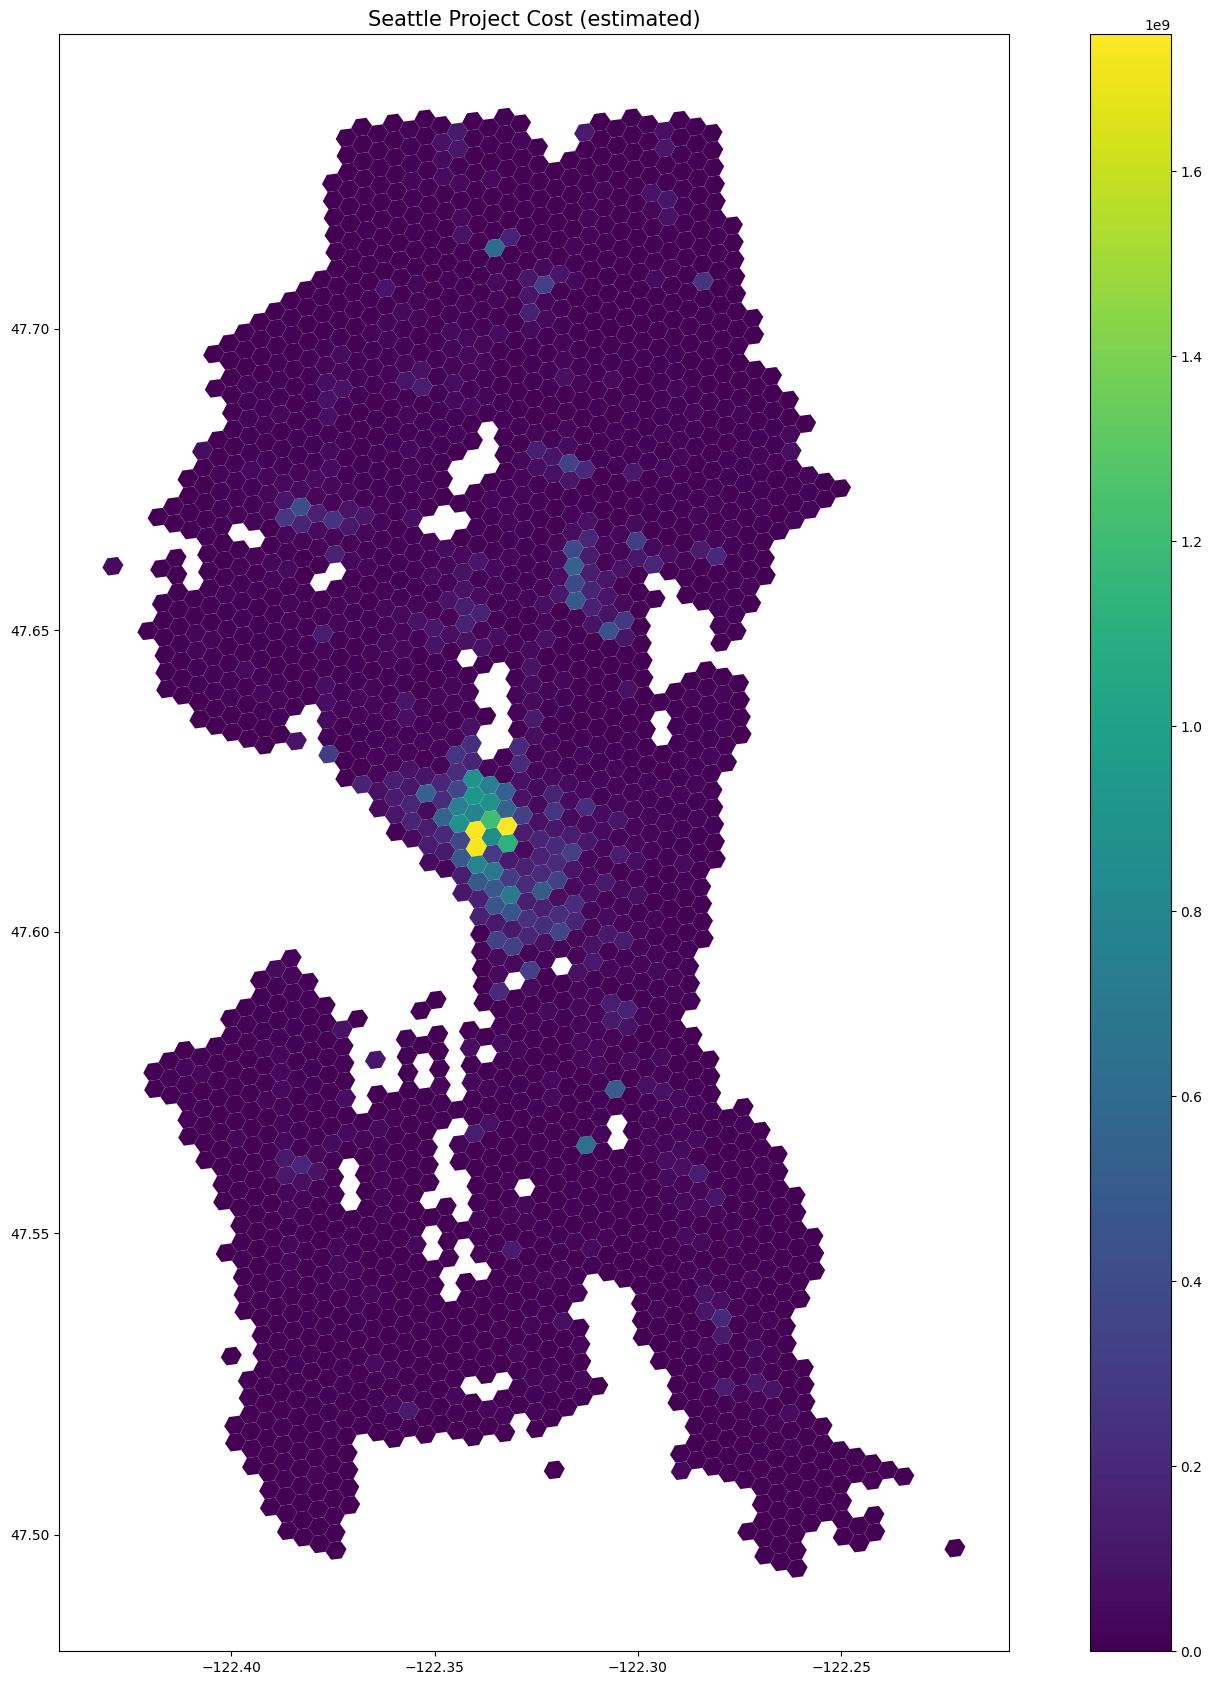

In [11]:
fig, ax = plt.subplots(figsize  = (21, 21))


#hex_df_list.get('hexagons_2010').plot(column = 'EstProjectCost',
hexes_all_years.plot(column = 'EstProjectCost',
                legend = True,
                #norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 100),
                ax = ax)

ax.set_title("Seattle Project Cost (estimated)", fontsize=15)

In [12]:
seattle_base_map = folium.Map(location=[47.6, -122.3], zoom_start=11, control_scale=True, tiles='OpenStreetMap')

In [13]:
frame2010byhex = hex_df_list.get('hexagons_2010')
frame2011byhex = hex_df_list.get('hexagons_2011')
frame2012byhex = hex_df_list.get('hexagons_2012')

hexes_grouped_2010 = frame2010byhex.groupby('h3_09').agg({'EstProjectCost':'sum'}).reset_index()
hexes_grouped_2011 = frame2011byhex.groupby('h3_09').agg({'EstProjectCost':'sum'}).reset_index()
hexes_grouped_2012 = frame2012byhex.groupby('h3_09').agg({'EstProjectCost':'sum'}).reset_index()


#for key, df in hex_df_list.items():
 #   all_hex_dfs_grouped = df.merge(all_hex_dfs_grouped, df)
        


In [23]:
##### create style dict
##### In this cell i am attempting to create the challenging (for me) style dict. 
##### Here is how I believe it needs to be structured.

"""
styledict = {
    hex1: {
        year1: {'color': 'red', 'opacity':'0.5'}
        year2: {'color': 'orange', 'opacity':'0.5'}
        .............
        }
    hex2: {
        year1: {'color': 'green', 'opacity':'0.5'}
        year2: {'color': 'blue', 'opacity':'0.5'}
        .............
        }
    }
"""

def create_style_dict(frame_2010, frame_2011, frame_2012):
    style_dict = {}

    for hex in all_hexagons_series:
        style_dict[hex] = {}
        
    
    for hex_index, hex_row in frame_2010.iterrows():
        current_hex_label = hex_row['h3_09']
        current_hex_agg_cost = hex_row['EstProjectCost']
        style_dict[current_hex_label] = {'2010': {'proj_cost': current_hex_agg_cost, 'opacity': '0.5'}}

    for hex_index, hex_row in frame_2011.iterrows():
        current_hex_label = hex_row['h3_09']
        current_hex_agg_cost = hex_row['EstProjectCost']
        if (style_dict[current_hex_label]):
            style_dict[current_hex_label] = style_dict[current_hex_label] | {'2011': {'proj_cost': current_hex_agg_cost, 'opacity': '0.5'}}    
        else:
            style_dict[current_hex_label] = {'2011': {'proj_cost': current_hex_agg_cost, 'opacity': '0.5'}}

    for hex_index, hex_row in frame_2012.iterrows():
        current_hex_label = hex_row['h3_09']
        current_hex_agg_cost = hex_row['EstProjectCost']
        if (style_dict[current_hex_label]):
            style_dict[current_hex_label] = style_dict[current_hex_label] | {'2012': {'proj_cost': current_hex_agg_cost, 'opacity': '0.5'}}    
        else:
            style_dict[current_hex_label] = {'2012': {'proj_cost': current_hex_agg_cost, 'opacity': '0.5'}}

    return style_dict
    

create_style_dict(hexes_grouped_2010, hexes_grouped_2011, hexes_grouped_2012)


{'8928d540103ffff': {'2010': {'proj_cost': 301208.0, 'opacity': '0.5'},
  '2011': {'proj_cost': 40000.0, 'opacity': '0.5'},
  '2012': {'proj_cost': 20000.0, 'opacity': '0.5'}},
 '8928d540107ffff': {'2010': {'proj_cost': 400797.0, 'opacity': '0.5'},
  '2011': {'proj_cost': 80000.0, 'opacity': '0.5'},
  '2012': {'proj_cost': 713444.0, 'opacity': '0.5'}},
 '8928d54010bffff': {'2010': {'proj_cost': 376000.0, 'opacity': '0.5'},
  '2011': {'proj_cost': 111142.0, 'opacity': '0.5'},
  '2012': {'proj_cost': 27650.0, 'opacity': '0.5'}},
 '8928d54010fffff': {'2010': {'proj_cost': 2133000.0, 'opacity': '0.5'},
  '2011': {'proj_cost': 1903000.0, 'opacity': '0.5'},
  '2012': {'proj_cost': 639215.0, 'opacity': '0.5'}},
 '8928d540113ffff': {'2010': {'proj_cost': 638045.0, 'opacity': '0.5'},
  '2011': {'proj_cost': 70000.0, 'opacity': '0.5'},
  '2012': {'proj_cost': 415000.0, 'opacity': '0.5'}},
 '8928d540117ffff': {'2010': {'proj_cost': 412197.0, 'opacity': '0.5'},
  '2011': {'proj_cost': 63789.0, 'op

In [15]:
def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "value"):
    
    ## Produce the GeoJSON for a dataframe, constructing the geometry from the "h3_09" column
    ## and with a property matching the one in column_name
       
    list_features = []
    
    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row["h3_09"],geo_json=True)]}
           # print (geometry_for_row)
            feature = Feature(geometry = geometry_for_row , id=row["h3_09"], properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["h3_09"])             

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

def get_color(custom_cm, val, vmin, vmax):
    return mpl.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

def choropleth_map(df_aggreg, column_name = "EstProjectCost", border_color = 'black', color_map_name = "plasma", initial_map = None):
    
    ## Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
      
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    print(f"Colour column min value {min_value}, max value {max_value}, mean value {mean_value}")
    print(f"Hexagon cell count: {df_aggreg['h3_09'].nunique()}")
    
    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)
    
   # if initial_map is None:
    #    initial_map = folium.Map(location= [47, 4], zoom_start=5.5, tiles="cartodbpositron")

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)

    # color_map_name 'Blues' for now, many more at https://matplotlib.org/stable/tutorials/colors/colormaps.html to choose from!
    custom_cm = mpl.colormaps[color_map_name]
    tt = {'EstProjectCost'}
    
    print  ((geojson_data[0:550]))
    
    ### i changed this from folium.Geojson to folium.Choropleth. It changed things up but good overall.
    folium.Choropleth(
        geo_data = geojson_data,
        data = df_aggreg,
        #tooltip = tt,
        fill_opacity=0.8,
        columns = ['h3_09', 'EstProjectCost'],
        key_on='feature.id',
        fill_color=color_map_name,
        highlight=True,
        style_function=lambda feature: {
            #'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            #'fillOpacity': 0.1
        }, 
        name = name_layer
    ).add_to(seattle_base_map)

    return seattle_base_map


#map_2010 = choropleth_map(hexes_grouped_2010)
multi_years = choropleth_map(hexes_all_years)

Colour column min value 0.0, max value 1748175350.0, mean value 31707329.25603787
Hexagon cell count: 2350
{"type": "FeatureCollection", "features": [{"type": "Feature", "id": "8928d540103ffff", "geometry": {"type": "Polygon", "coordinates": [[[-122.279036, 47.658034], [-122.277842, 47.659573], [-122.279241, 47.660886], [-122.281833, 47.660659], [-122.283027, 47.65912], [-122.281628, 47.657807], [-122.279036, 47.658034]]]}, "properties": {"EstProjectCost": 6658024.0}}, {"type": "Feature", "id": "8928d540107ffff", "geometry": {"type": "Polygon", "coordinates": [[[-122.283027, 47.65912], [-122.281833, 47.660659], [-122.283232, 47.661972], [-122.285824


In [16]:
#type(map_2010)

seattle_base_map

In [17]:
#type(hex_df_list)
hex_dict_list = {}

#print (type(hex_df_list.get('hexagons_2008')))
#print (hex_df_list.

for key, df in hex_df_list.items():
    #print (type(df.head()))
    #hex_dict_list.append(df.to_dict())
    hex_dict_list['key'] = df.to_dict()

#print (type(hex_dict_list.pop))

In [18]:
frame2015byhex = hex_df_list.get('hexagons_2015').reset_index()

frame2015byhexGrouped = frame2015byhex.groupby('h3_09').agg({'EstProjectCost':'sum'}).reset_index()

frame2015byhexGrouped

,h3_09,EstProjectCost
0,8928d540103ffff,285000.0
1,8928d540107ffff,166400.0
2,8928d54010bffff,520645.0
3,8928d54010fffff,5688502.0
4,8928d540113ffff,97000.0
...,...,...
1780,8928d5576bbffff,6000.0
1781,8928d5576c3ffff,18000.0
1782,8928d5576cbffff,85375.0
1783,8928d5576cfffff,10000.0


In [19]:
#geo_permits_df.head()
#geo_json_obj = geo_permits_df['geometry'].to_json()


#geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)



#frame2015byhex = hex_df_list.get('hexagons_2015').reset_index()

#frame2015geojson = frame2015byhex.to_json()

#print ((frame2015geojson))

#frame2015byhex = frame2015byhex.groupby('h3_09').agg({'EstProjectCost':'sum'}).reset_index()


#hexes_grouped_all = hex_df_list.groupby('h3_09').agg({'EstProjectCost':'sum'}).reset_index()

#frame2015byhex = frame2015byhex.to_json()


#geo_json_obj = hexagons_dataframe_to_geojson(df_hex= geo_permits_df, column_name='EstProjectCost')

#print ((hex_df_list))
#print (type(hex_df_list.get('hexagons_2015')))

#hex_gdf_2015 = hex_df_list.get('hexagons_2015')

#hex_dict_2015 = hex_gdf_2015.to_dict()

#frame2015byhex.head().reset_index()

#something = TimeSliderChoropleth(geo_json_obj,hex_dict_list).add_to(seattle_base_map)
#something = TimeSliderChoropleth(frame2015geojson,hex_dict_2015).add_to(seattle_base_map)

In [20]:
seattle_base_map

In [21]:
#### single heat map attempt


""" Making Block Comment
lat = dfDict.get(2008)['Latitude']
long = dfDict.get(2008)['Longitude']

#lat.iloc[4]

#HeatMap(data=df[['latitude','longitude']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius=7, max_zoom=10).add_to(base_map)

heat_data = dfDict.get(2008)[['Latitude','Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist()

plugins.HeatMap(heat_data).add_to(seattle_base_map)

seattle_base_map
"""

" Making Block Comment\nlat = dfDict.get(2008)['Latitude']\nlong = dfDict.get(2008)['Longitude']\n\n#lat.iloc[4]\n\n#HeatMap(data=df[['latitude','longitude']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius=7, max_zoom=10).add_to(base_map)\n\nheat_data = dfDict.get(2008)[['Latitude','Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist()\n\nplugins.HeatMap(heat_data).add_to(seattle_base_map)\n\nseattle_base_map\n"

In [22]:
#### heat maps time attempt

#heatmaptimed = HeatMapWithTime(data = list(dfDict), radius = 10, index = indexlist, auto_play=True, max_opacity=0.5)

#heatmaptimed.add_to(seattle_base_map)

#seattle_base_map
#heatmap.to_json()